In [1]:
import numpy as np
from matplotlib import pyplot as plt
# import pandas as pd
import os
import cv2
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten
import copy
import pickle

# Importing data

In [2]:
def data_import(data_path):
    class_labels = os.listdir(data_path) # reads directory names as class-labels
    data=[]
    labels=[]
    for class_ in class_labels:
        if class_ == '.DS_Store':
            continue
        class_path = data_path+'/'+class_
        imgs = os.listdir(class_path) # reads images names to read
        for img in imgs:
            if img == '.DS_Store':
                continue
            data.append(cv2.imread(class_path+'/'+img, cv2.IMREAD_GRAYSCALE))
            labels.append(int(class_))

    return np.array(data), np.array(labels)

In [3]:
test_path='./Group_10/test'
train_path='./Group_10/train'
val_path='./Group_10/val'
# test_data, test_labels = data_import(test_path)
# train_data, train_labels = data_import(train_path)
# val_data, val_labels = data_import(val_path)

# with open('test_data', mode='wb') as f:
#     pickle.dump(test_data, f)
# with open('train_data', mode='wb') as f:
#     pickle.dump(train_data, f)
# with open('val_data', mode='wb') as f:
#     pickle.dump(val_data, f)

# with open('test_labels', mode='wb') as f:
#     pickle.dump(test_labels, f)
# with open('train_labels', mode='wb') as f:
#     pickle.dump(train_labels, f)
# with open('val_labels', mode='wb') as f:
#     pickle.dump(val_labels, f)

with open('test_data', mode='rb') as f:
    test_data = pickle.load(f)
with open('train_data', mode='rb') as f:
    train_data = pickle.load(f)
with open('val_data', mode='rb') as f:
    val_data = pickle.load(f)

with open('test_labels', mode='rb') as f:
    test_labels = pickle.load(f)
with open('train_labels', mode='rb') as f:
    train_labels = pickle.load(f)
with open('val_labels', mode='rb') as f:
    val_labels = pickle.load(f)

print('Summary of data')
print(f'No. of train images: {len(train_data)}')
print(f'No. of test images: {len(test_data)}')
print(f'No. of val images: {len(val_data)}')


Summary of data
No. of train images: 11385
No. of test images: 3795
No. of val images: 3795


## Batch

### Model

In [4]:
initializer = keras.initializers.RandomUniform(minval=-1, maxval=1, seed=6)
# Three layer FCNN
model_3 = keras.Sequential([
    Flatten(input_shape=(28,28), name='Input_layer'), # image data as input
    Dense(250, activation='sigmoid', name='Hidden_layer_1'),
    Dense(400, activation='sigmoid', name='Hidden_layer_2'),
    Dense(100, activation='sigmoid', name='Hidden_layer_3'),
    Dense(10, activation='softmax', name='Output')
], name='FCNN_3layer')
model_3.summary()

Model: "FCNN_3layer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Flatten)       (None, 784)               0         
                                                                 
 Hidden_layer_1 (Dense)      (None, 250)               196250    
                                                                 
 Hidden_layer_2 (Dense)      (None, 300)               75300     
                                                                 
 Hidden_layer_3 (Dense)      (None, 100)               30100     
                                                                 
 Output (Dense)              (None, 10)                1010      
                                                                 
Total params: 302,660
Trainable params: 302,660
Non-trainable params: 0
_________________________________________________________________


In [5]:
earlystopping = keras.callbacks.EarlyStopping(monitor='loss', min_delta=1e-4, patience=3, verbose=1)
# modelCheckpointsBGD = keras.callbacks.ModelCheckpoint(filepath="./modelCheckpoints/BatchGradDescent/model.{epoch:02d}-{loss:.2f}.h5")
bgd_optimizer = keras.optimizers.SGD(learning_rate=0.001, name='Batch_Grad_Decent', momentum=0)
model_3.compile(optimizer=bgd_optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [6]:
history = model_3.fit(x=train_data, y=train_labels, batch_size=11_385, epochs=100_000,
                    callbacks=[earlystopping],
                    verbose='auto',
                    validation_split=0.0, validation_data=(val_data, val_labels), validation_batch_size=None)

Epoch 1/100000


2023-03-16 11:57:25.322126: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 358ms/step - loss: 6.2395 - accuracy: 0.0255 - val_loss: 6.2351 - val_accuracy: 0.0332
Epoch 2/100000
1/1 [==============================] - 0s 73ms/step - loss: 6.2079 - accuracy: 0.0264 - val_loss: 6.2049 - val_accuracy: 0.0340
Epoch 3/100000
1/1 [==============================] - 0s 72ms/step - loss: 6.1767 - accuracy: 0.0275 - val_loss: 6.1751 - val_accuracy: 0.0348
Epoch 4/100000
1/1 [==============================] - 0s 73ms/step - loss: 6.1461 - accuracy: 0.0280 - val_loss: 6.1458 - val_accuracy: 0.0353
Epoch 5/100000
1/1 [==============================] - 0s 74ms/step - loss: 6.1159 - accuracy: 0.0300 - val_loss: 6.1168 - val_accuracy: 0.0361
Epoch 6/100000
1/1 [==============================] - 0s 72ms/step - loss: 6.0862 - accuracy: 0.0311 - val_loss: 6.0883 - val_accuracy: 0.0369
Epoch 7/100000
1/1 [==============================] - 0s 74ms/step - loss: 6.0569 - accuracy: 0.0318 - val_loss: 6.0602 - val_accuracy: 0.0379
Epoch 8/10000

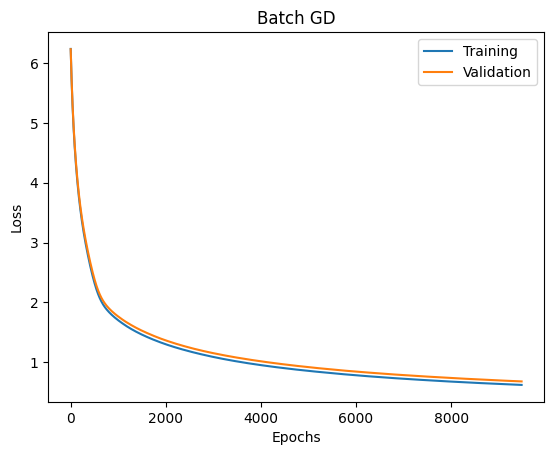

In [7]:
plt.figure()
plt.title("Batch GD")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()

### Test

In [8]:
model_3.evaluate(test_data, test_labels)

119/119 [==============================] - 0s 622us/step - loss: 0.7039 - accuracy: 0.7426


[0.7039023637771606, 0.7425559759140015]

In [9]:
pred_labels = model_3.predict(test_data, verbose=0)
pred_labels = np.argmax(pred_labels, axis=1)

confusion_matrix = tf.math.confusion_matrix(test_labels, pred_labels, num_classes=10)
print('(Batch GD)Confusion matrix on test data:\n')
print(confusion_matrix.numpy())

(Batch GD)Confusion matrix on test data:

[[598   8  60   0   0   0  65  28   0   0]
 [  6 662  54   0   0   0  18  19   0   0]
 [ 66  40 461   0   0   0 154  38   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [ 72  38 113   0   0   0 495  41   0   0]
 [ 28  52  56   0   0   0  21 602   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]
